K means Clustering:
------------------------------

Problem Statement:
 Given the dataset of details on customer visiting mall, we need to categorize or cluster them to an optimum number based on theier financial aspects like income, Spending score etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.head())

#Considering only Income & Spending score features
data = dataset.iloc[:, [3, 4]].values
print(data[:5])

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


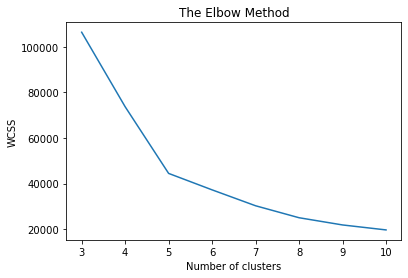

In [2]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

distance = []
cluster_number = range(3,11)
#Checking how the clusters and the distances are for the no. of clusters ranging from 3 to 10
for i in cluster_number:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data)
    distance.append(kmeans.inertia_) # within cluster sum
    
plt.plot(cluster_number, distance)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [3]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state=42)

y_kmeans = kmeans.fit_predict(data)  # fit  --> predicting
dataset['result']=y_kmeans
dataset
# dataset.result.unique()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),result
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [4]:
dataset[dataset.result==4].head(12)

# Cluster 0   -- Avg Income, Avg SPending
# Cluster 1   -- High. Income and Low. Spending
# Cluster 2   -- Low Income and Low Spending
# Cluster 3   -- Low Income and High Spending
# Cluster 4   -- High Income and High Spending


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),result
123,124,Male,39,69,91,4
125,126,Female,31,70,77,4
127,128,Male,40,71,95,4
129,130,Male,38,71,75,4
131,132,Male,39,71,75,4
133,134,Female,31,72,71,4
135,136,Female,29,73,88,4
137,138,Male,32,73,73,4
139,140,Female,35,74,72,4
141,142,Male,32,75,93,4


In [5]:
#Check the data points of cluster centers
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


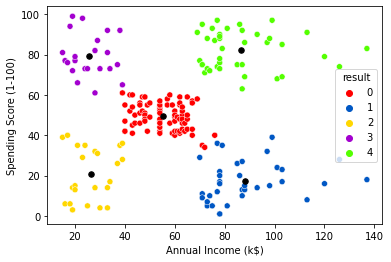

In [6]:
import seaborn as sns
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                data = dataset,
                hue = dataset.result ,
                palette = 'prism')

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color = 'black', s = 30)
plt.show()

In [7]:
#Exporting the clustered data to a csv file
dataset.to_csv('cluster data.csv')

<IPython.core.display.Javascript object>


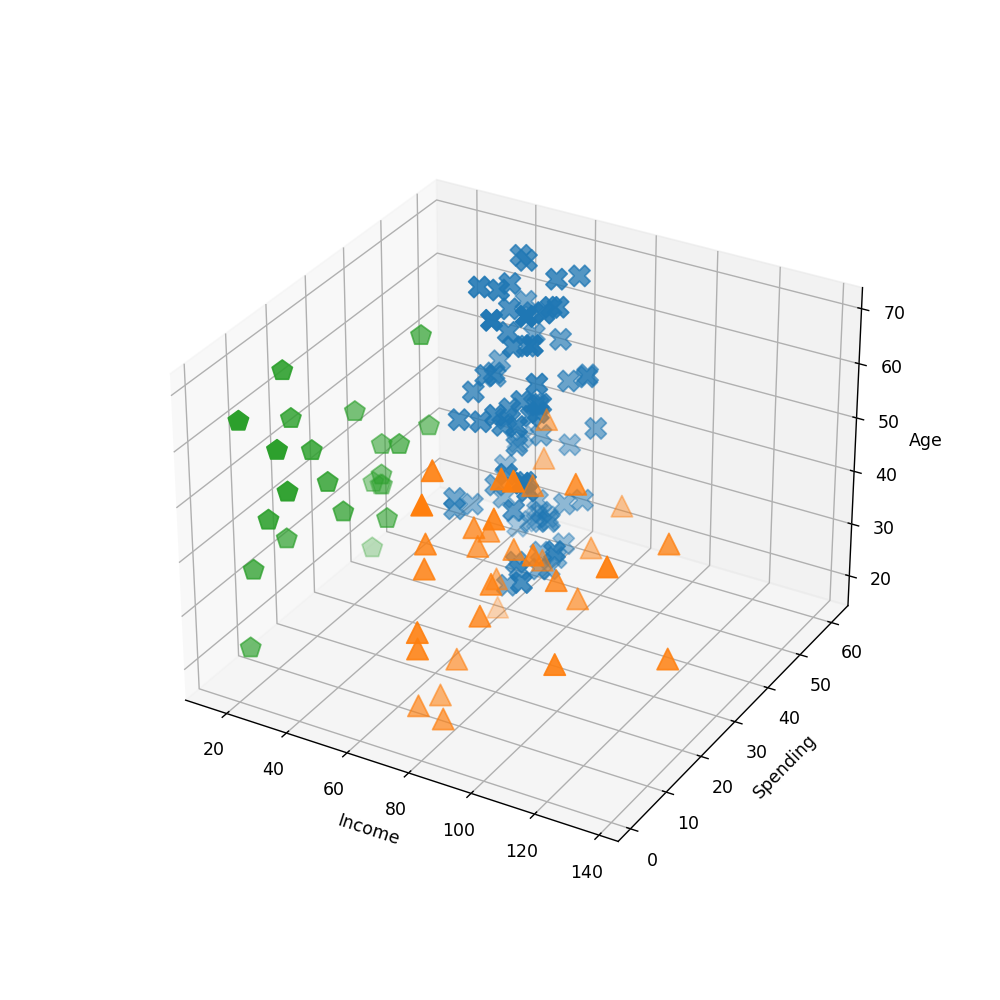

Text(0.5, 0, 'Age')

In [8]:
#Checking the data in the 3D Area
%matplotlib notebook

fig = plt.figure(figsize = (8,8))
from mpl_toolkits.mplot3d import Axes3D


ax = plt.axes(projection='3d')

cluster_0_points=dataset[dataset['result'] == 0].index
cluster_1_points=dataset[dataset['result'] == 1].index
cluster_2_points=dataset[dataset['result'] == 2].index
# cluster_3_points=dataset[dataset['result'] == 3].index
# cluster_4_points=dataset[dataset['result'] == 4].index
# print(cluster_0_points, cluster_1_points, cluster_2_points)


xline = dataset.iloc[cluster_0_points,3].values
yline = dataset.iloc[cluster_0_points,4].values
zline = dataset.iloc[cluster_0_points,2].values
ax.scatter3D(xline, yline, zline, s = 150, marker = 'X' )

xdata_1 = dataset.iloc[cluster_1_points,3].values
ydata_1 = dataset.iloc[cluster_1_points,4].values
zdata_1 = dataset.iloc[cluster_1_points,2].values
ax.scatter3D(xdata_1, ydata_1, zdata_1,  s = 150, marker = '^' )


xline_2 = dataset.iloc[cluster_2_points,3].values
yline_2 = dataset.iloc[cluster_2_points,4].values
zline_2 = dataset.iloc[cluster_2_points,2].values
ax.scatter3D(xline_2, yline_2, zline_2, s = 150, marker = 'p')


ax.set_xlabel('Income')
ax.set_ylabel('Spending')
ax.set_zlabel('Age')